In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("glass.csv")
df = df.fillna(df.mean())
feature_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'] # numeric feature columns.
X = df.drop('Type', axis = 1).values
y = df['Type'].values.reshape(-1,1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 1. Полносвязные сети (многослойный персептрон)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import  export_graphviz

from sklearn.neural_network import MLPClassifier

In [4]:
parameters_mlp = {  'model__activation' : ['identity', 'logistic', 'tanh', 'relu'],
                    'model__hidden_layer_sizes' : [1000, 2000],
                    'model__solver' : ['sgd', 'adam'],
                    'model__learning_rate' : ['constant', 'invscaling', 'adaptive'],
                    'model__random_state':[0]
                 }

In [5]:
def apply_ml_model(ml_model,parameters, X_train, y_train):
    steps = [
        ('scalar', StandardScaler()),
        ('model', ml_model)
    ]
    model_pipe = Pipeline(steps)

    ml_model = GridSearchCV(model_pipe, parameters, cv = 3, n_jobs = -1)
    ml_model = ml_model.fit(X_train, y_train.ravel())
    
    y_pred_train = ml_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    y_pred_test = ml_model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    print("confusion_matrix")
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap = 'viridis', fmt='.0f')
    plt.show()
    print("Training set: ", accuracy_train)
    print("Test set: ", accuracy_test)
    print(classification_report(y_test, y_pred_test))
    print(ml_model.best_params_)

confusion_matrix


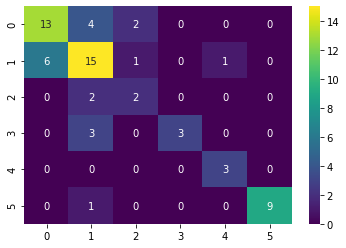

Training set:  0.9530201342281879
Test set:  0.6923076923076923
              precision    recall  f1-score   support

           1       0.68      0.68      0.68        19
           2       0.60      0.65      0.63        23
           3       0.40      0.50      0.44         4
           5       1.00      0.50      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.69        65
   macro avg       0.74      0.71      0.70        65
weighted avg       0.72      0.69      0.70        65

{'model__activation': 'relu', 'model__hidden_layer_sizes': 2000, 'model__learning_rate': 'constant', 'model__random_state': 0, 'model__solver': 'adam'}


In [6]:
ml_model = MLPClassifier()
apply_ml_model(ml_model,parameters_mlp, X_train, y_train)

`KNN`

Training set:  1.0

Test set:  0.7904761904761904

`RFC`

Training set:  1.0

Test set:  0.819047619047619
    
`AdaBoost`

Training set:  0.8126984126984127

Test set:  0.6285714285714286
    
`SVC`

Training set:  0.9682539682539683

Test set:  0.8952380952380953

`GradientBoost`

Training set:  1.0

Test set:  0.7904761904761904

`DecisionTree`

Training set:  0.9714285714285714

Test set:  0.6952380952380952

## 2. Сверточные сети

In [34]:
import re
import random
import numpy as np
import pandas as pd

from tensorflow import keras

from skimage.io import imread, imshow

In [37]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

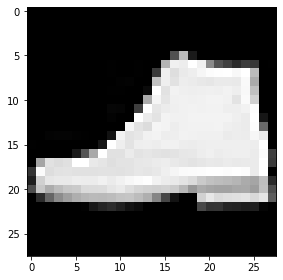

In [42]:
imshow(x_train[42])

In [10]:
inputs = keras.Input(shape=(28, 28, 1))

x = keras.layers.Conv2D(64, 3, activation="relu")(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Flatten()(x)

outputs = keras.layers.Dense(10)(x)

cnn_model = keras.Model(inputs=inputs, outputs=outputs, name="cnn_model")
# cnn_model.summary()

In [11]:
cnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

In [12]:
cnn_model.fit(x_train, y_train, batch_size=256, epochs=5, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 42s 221ms/step - loss: 2.3882 - accuracy: 0.7598 - val_loss: 0.5879 - val_accuracy: 0.8519
Epoch 2/5
188/188 [==============================] - 44s 232ms/step - loss: 0.4410 - accuracy: 0.8919 - val_loss: 0.5927 - val_accuracy: 0.8717
Epoch 3/5
188/188 [==============================] - 41s 218ms/step - loss: 0.2659 - accuracy: 0.9258 - val_loss: 0.6698 - val_accuracy: 0.8661
Epoch 4/5
188/188 [==============================] - 42s 225ms/step - loss: 0.1885 - accuracy: 0.9432 - val_loss: 0.6463 - val_accuracy: 0.8754
Epoch 5/5
188/188 [==============================] - 48s 258ms/step - loss: 0.1504 - accuracy: 0.9533 - val_loss: 0.7679 - val_accuracy: 0.8702


In [13]:
test_scores = cnn_model.evaluate(x_test, y_test, verbose=2)

print(f"Test accuracy: { test_scores[1]} | Test loss: {test_scores[0]}")

313/313 - 2s - loss: 0.8143 - accuracy: 0.8664
Test accuracy: 0.8664000034332275 | Test loss: 0.8142925500869751


In [15]:
# Recurrent neural network

In [17]:
import re
import random
import numpy as np
import pandas as pd

from tensorflow import keras

from nltk.corpus import stopwords
from nltk import download

from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
df = pd.read_csv("clickbait_ds.csv", delimiter=';')
df.head()

,Text,Clickbait
0,Snoopy Got A Star On The Walk Of Fame And Seem...,1
1,15 Tweets That Are Too Real For Anyone Who Has...,1
2,"Try To Stay Calm '90s Kids, But The ""Full Hous...",1
3,P1 Pico Projector Stands Out From a Small Crowd,0
4,NBA: Gilbert Arenas and Javaris Crittenton sus...,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        32000 non-null  object
 1    Clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


In [21]:
def delete_stopwords(str_x):
    words = str_x.split(' ')
    neutral_words = ['one', 'say', 'page', 'know', 'go', 'back', 'take', 'see', 'look', 'article',
                     'edit', 'got', 'thing', 'want', 'make', 'people']
    new_words = list()
    for word in words:
        if word not in stopwords.words('english') or word not in neutral_words:
            new_words.append(word)
    return ' '.join(new_words)

In [22]:
download('stopwords')

[nltk_data] Downloading package stopwords to /home/pavel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
vectorizer = TfidfVectorizer()

In [24]:
X = vectorizer.fit_transform(df["Text"].values).toarray()
Y = df.iloc[:, 1].values

num_samples = 500 #X.shape[0]
train_samples = int(0.75*num_samples)

indexes = np.arange(num_samples)
random.shuffle(indexes)

In [25]:
X, Y = X[indexes], Y[indexes]
x_train, y_train = X[:train_samples, :], Y[:train_samples]
x_test, y_test = X[train_samples:, :], Y[train_samples:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(375, 22761) (375,)
(125, 22761) (125,)


In [26]:
inputs = keras.Input(shape=(22761, 1))

x = keras.layers.LSTM(128)(inputs)

outputs = keras.layers.Dense(1, activation="softmax")(x)

In [27]:
rnn_model = keras.Model(inputs=inputs, outputs=outputs, name="rnn_model")
rnn_model.summary()

Model: "rnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 22761, 1)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
rnn_model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

In [29]:
rnn_model.fit(x_train, y_train, batch_size=4, epochs=1, validation_split=0.2)

75/75 [==============================] - 2066s 28s/step - loss: 0.0000e+00 - accuracy: 0.4584 - val_loss: 0.0000e+00 - val_accuracy: 0.4267


In [30]:
test_scores = rnn_model.evaluate(x_test, y_test, verbose=2)

print(f"Test loss: {test_scores[0]}  |  Test accuracy:", test_scores[1])


4/4 - 15s - loss: 0.0000e+00 - accuracy: 0.4480
Test loss: 0.0  |  Test accuracy: 0.4480000138282776
